In [1]:
############################################################################
# OpenEnsemble Project													   #
# Testing the mixture model for the  dataset.                          #
############################################################################
import numpy as np 
import pandas as pd 
#import mixture_model
#import utilities
#import fitnessmetric
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe
import sklearn.cluster as skc


#comment this to suppress showing in notebooks
%matplotlib inline 

## Generate Half Rings points.
halfRings = []
while(True):
    x = np.random.normal(0,20)
    y = np.random.normal(0,20)
    z = np.random.normal(0,20)
    if ((x ** 2 + y ** 2) >= 0.5) and ((x ** 2 + y ** 2) <= 1):
        halfRings.append(list([x,y]))
    elif ((x ** 2 + y ** 2) >= 10) and ((x ** 2 + y ** 2) <= 11):
        halfRings.append(list([x,y]))
        
    if len(halfRings) == 400:
        break

halfRings = np.asarray(halfRings)
df = pd.DataFrame(halfRings)
dataObj = oe.data(df, [1,2])



In [2]:
dataObj.D['parent'].shape[0]

400

In [3]:
c = oe.cluster(dataObj)
c.algorithms_available()

{'DBSCAN': '', 'agglomerative': '', 'kmeans': '', 'spectral': ''}

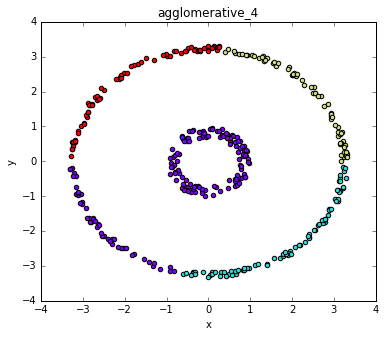

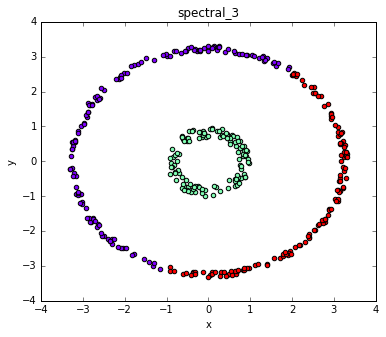

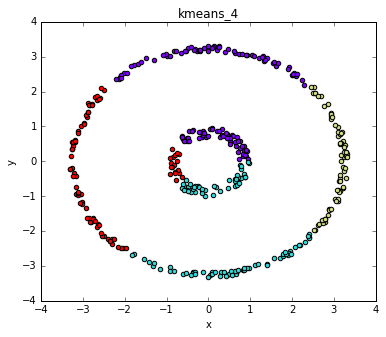

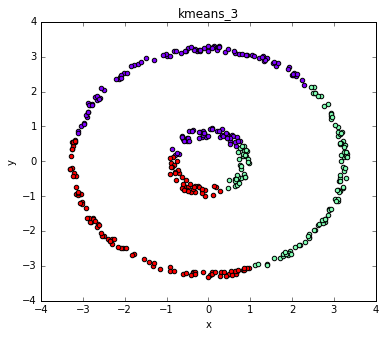

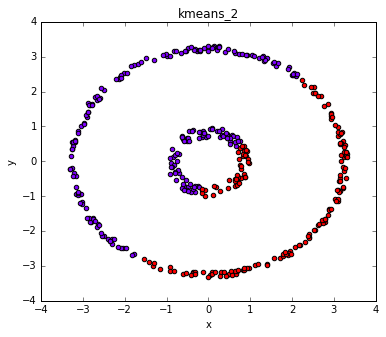

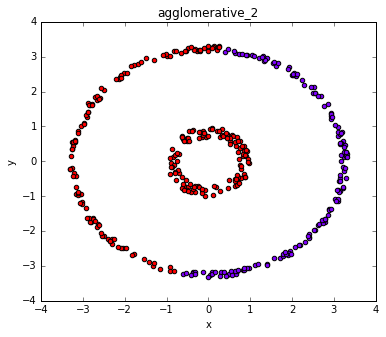

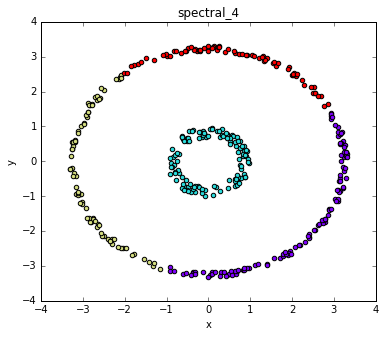

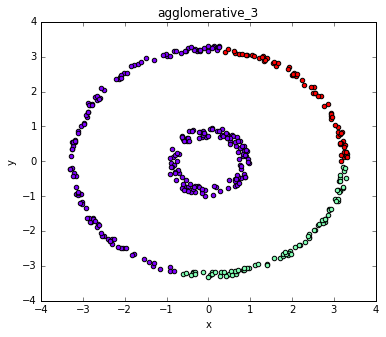

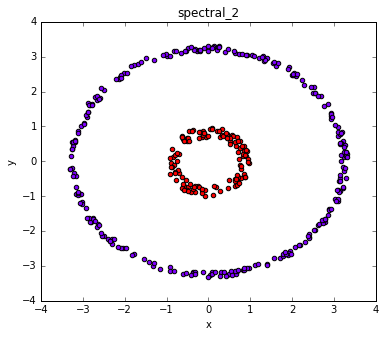

In [4]:
##################################################
# Part I: Base Solutions                         #
##################################################

# 'Hirarch_Clust_2': skc.AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward'),
# 'Hirarch_Clust_3': skc.AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward'),

#baseSolutions = {'K_means_2': skc.KMeans(n_clusters=2), 'K_means_3': skc.KMeans(n_clusters=3),
#                    'Spectral_2': skc.SpectralClustering(n_clusters=2),'Spectral_3': skc.SpectralClustering(n_clusters=3)}
fignum = 1
parg = []

c = oe.cluster(dataObj)
K = [2,3,4]
algorithms = ['spectral', 'kmeans', 'agglomerative']
X = dataObj.D['parent']
for k in K:
    for algorithm in algorithms:
        name = "%s_%d"%(algorithm, k)
        c.cluster('parent', algorithm, name, K=k)

## Plot base clustering solutions


for solution in c.labels:
    fig = plt.figure(fignum, figsize=(6, 5))
    plt.clf() # clear the current figure
    fig.add_axes(rect= [0,0,0.95,1])

    plt.cla() # clear the current axis
    plt.hold(True)
    color=iter(cm.rainbow(np.linspace(0,1,len(c.clusterNumbers[solution]))))
    labels = c.labels[solution]
    for clusterNum in c.clusterNumbers[solution]:
        indexes = np.where(labels==clusterNum)
        plt.scatter(X[indexes,0], X[indexes,1], c=next(color))

    plt.title(solution)
    plt.ylabel('y')
    plt.xlabel('x')
    fignum += 1



/Users/knaegle/GIT/openensembles.main/finishing.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'NaN' in np.unique(self.y.iloc[:,i].values):


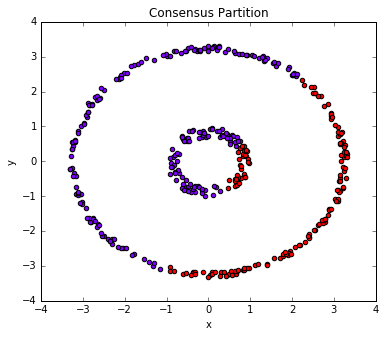

In [5]:
##################################################
# Consensus Partition                            #
##################################################
## Plot consensus partition
fig = plt.figure(fignum, figsize=(6, 5))
plt.clf() # clear the current figure
fig.add_axes(rect= [0,0,0.95,1])
plt.cla() # clear the current axis

c_MM = c.mixture_model(K=2)

#N = 400
#nEnsCluster = 2
#list_of_baseSolutions = parg
#ensembleObj = mixture_model.mixtureModel(list_of_baseSolutions, N, nEnsCluster, iterations=10)
#piFinishing, consLabels = ensembleObj.emProcess()

#parg.append(labels)
labels = c_MM.labels['mixture_model']
numClusters = np.unique(labels)
color=iter(cm.rainbow(np.linspace(0,1,len(numClusters))))
    
for clusterNum in numClusters:
        indexes = np.where(labels==clusterNum)
        plt.scatter(X[indexes,0], X[indexes,1], c=next(color))
        
#plt.scatter(X[:,0], X[:,1], c=labels.astype(np.float))
plt.title('Consensus Partition')
plt.ylabel('y')
plt.xlabel('x')




# Validation Metric: Comparison of Solutions

In [7]:
## 
v = oe.validation(dataObj, c)
#calculate the validation on parent data
source_name = 'parent'
validation_name= 'det_ratio' #determinant ratio is a measure of connectedness
for solution in c.labels:
    v.calculate(validation_name, solution, source_name)

v_mm = oe.validation(dataObj,c_MM)
v_mm.calculate(validation_name, 'mixture_model', 'parent')


/Users/knaegle/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [8]:
# Print the results
for val in v.validation:
    print("%s\t%1.3f"%(v.cluster_name[val], v.validation[val]))
for val in v_mm.validation:
    print("%s\t%1.3f"%(v_mm.cluster_name[val], v_mm.validation[val]))

kmeans_2	3.191
spectral_4	10.265
spectral_2	1.002
kmeans_3	5.724
agglomerative_2	2.456
kmeans_4	11.579
spectral_3	5.070
agglomerative_3	4.290
agglomerative_4	11.113
mixture_model	3.109
